In [1]:
import minepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot, os, sys

from iminuit import Minuit


In [2]:
data_path = "../../Data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

features = data_tree.keys(data_tree.keys()[:139])
features.remove(b"v0_ks_mass")

N_data = 5000
df = data_tree.pandas.df(features, entrystop = N_data)
mass = data_tree.pandas.df(b"v0_ks_mass", entrystop = N_data)

In [12]:
mics_mc = {}
pear_mc = {}

for col in df.columns:
    mine = minepy.MINE()
    mine.compute_score(mass.values.flatten(), df[col].values.flatten())
#     print(f"{col}: {mine.mic():.3f}")
    mics_mc[col] = mine.mic()
    pear_mc[col] = np.corrcoef(mass.values.flatten(), df[col].values.flatten())[0, 1]

In [14]:
{k: (v, pear_mc[k]) for k, v in sorted(mics_mc.items(), key=lambda item: item[1], reverse = True)[:40]}

{'pT': (0.4702431785296978, 0.6671742157290241),
 'v0_ks_massErr': (0.3425752834139658, 0.5716585872345982),
 'trueKs': (0.2912166814399217, -0.02218177009775142),
 'trueKs_x': (0.2912166814399217, -0.02218179001670448),
 'trueKs_y': (0.2912166814399217, -0.02218179453177523),
 'trueKs_z': (0.2912166814399217, -0.02218143277748007),
 'alpha': (0.257456327145269, -0.07131299996751521),
 'Alpha': (0.257456327145269, -0.07131299494009263),
 'calpha': (0.21351221246276092, -0.3847218445710511),
 'cosTheta': (0.1831395113533299, -0.049508065652257585),
 'v0_rxyErr': (0.17576840587312273, -0.18827344905457485),
 'v0_la_mass': (0.16973117904824023, 0.38532732907086775),
 'v0_lb_mass': (0.14347094886235404, 0.2853395228997734),
 'trueGa': (0.13577510701637027, -0.2435741923226813),
 'trueGa_x': (0.13577510701637027, -0.24357396757778074),
 'trueGa_y': (0.13577510701637027, -0.24357391593288483),
 'trueGa_z': (0.13577510701637027, -0.2435731537199997),
 'thetastar': (0.1269877337718484, 0.07625

In [3]:
data_path = "../../Data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

features = data_tree.keys(data_tree.keys()[:139])
features.remove(b"v0_ks_mass")

N_data = 5000
df = data_tree.pandas.df(features, entrystop = N_data)
mass = data_tree.pandas.df(b"v0_ks_mass", entrystop = N_data)

In [6]:
from scipy.special import logit
logcos = df.cosTheta.apply(lambda x: logit((x + 1)/2))
mine = minepy.MINE()
mine.compute_score(mass.values.flatten(), logcos.values.flatten())
print(mine.mic())

0.1523305868594224


In [7]:
mics = {}
pear = {}

for col in df.columns:
    mine = minepy.MINE()
    mine.compute_score(mass.values.flatten(), df[col].values.flatten())
#     print(f"{col}: {mine.mic():.3f}")
    mics[col] = mine.mic()
    pear[col] = np.corrcoef(mass.values.flatten(), df[col].values.flatten())[0, 1]

In [8]:
{k: (v, pear[k]) for k, v in sorted(mics.items(), key=lambda item: item[1], reverse = True)[:20]}

{'pT': (0.4741391245325178, 0.6774518621649932),
 'v0_ks_massErr': (0.3789575411194499, 0.49420428707031333),
 'alpha': (0.2823922275691578, -0.0165252419212433),
 'Alpha': (0.2823922275691578, -0.01652523840159938),
 'calpha': (0.22234988990530077, -0.38287792697950895),
 'v0_rxyErr': (0.1723976681464505, -0.20244291587722618),
 'v0_la_mass': (0.16228832950789454, 0.3683091755140039),
 'v0_lb_mass': (0.1584300341811528, 0.3320038396811863),
 'cosTheta': (0.1523305868594224, -0.028575781814197978),
 'pL1': (0.1291492052316309, 0.1281533288173096),
 'v0_rxy': (0.1278187805767846, -0.1463917737640998),
 'thetastar': (0.12604262382764644, 0.01481177419836214),
 'pL2': (0.11800218574781625, 0.11714249455432273),
 'v0_x': (0.116200179266777, 0.023774133965280334),
 'v0_pt': (0.11515911206494168, 0.13581347787493273),
 'a0': (0.1116817124007811, -0.05593378992951021),
 'a0z': (0.1116817124007811, -0.05593378992951021),
 'v0_lb_massErr': (0.11058779876995997, 0.15911543330531044),
 'numberOfS

In [4]:
features = "pT v0_ks_massErr alpha calpha v0_rxyErr cosTheta pL1 v0_rxy thetastar".split(" ")

In [5]:
Ndata = 10**6
test_ratio = 0.2

df = data_tree.pandas.df(features, entrystop = Ndata)

mass = data_tree.pandas.df("v0_ks_mass", entrystop = Ndata)

from sklearn.model_selection import train_test_split
df_train, df_test, mass_train, mass_test= train_test_split(df, mass, test_size = test_ratio)

In [6]:
mean, sig = 498.26, 7.005

from lightgbm import LGBMClassifier

# Apply range
mass = mass_train[(mass_train > 400) & (mass_train < 600)].dropna()

pseudo_true = mass[abs(mass - mean) <  sig].dropna()

am = len(pseudo_true)

# True false
low_false = mass[(mass  + 7 * sig < mean)|(mass  + 10 * sig > mean)].dropna().sample(am)
high_false = mass[(mass  - 10 * sig > mean)|(mass  - 7 * sig < mean)].dropna().sample(am)

# Make df
indicies = pd.concat([pseudo_true, low_false, high_false]).index

target = pd.Series(np.zeros(len(indicies), dtype = int), indicies, dtype = bool)
target.loc[pseudo_true.index] = 1

model = LGBMClassifier()
model.fit(df_train.loc[target.index, :], target.astype(bool))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
import sys
sys.path.append("../py_files")
import functions as f
import importlib
from ExternalFunctions import nice_string_output, add_text_to_ax

importlib.reload(f)

<module 'functions' from '../py_files/functions.py'>

/opt/conda/envs/python3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/opt/conda/envs/python3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


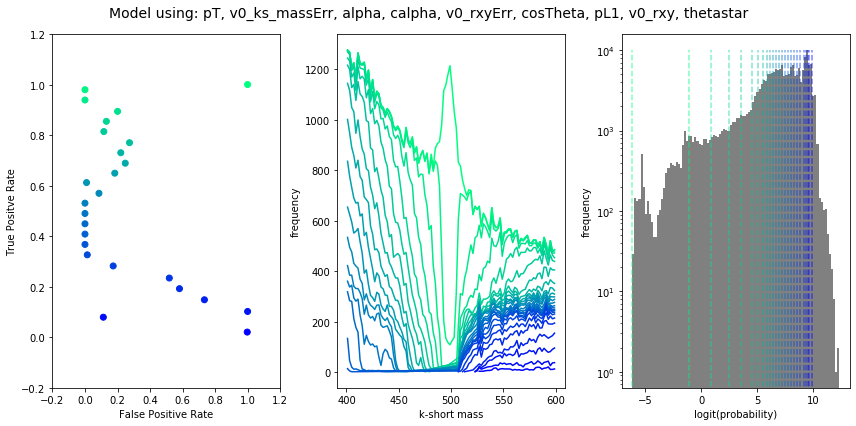

In [8]:
fig, ax = plt.subplots(ncols = 3, figsize = (12, 6))

probs = model.predict_proba(df_test)
from scipy.special import logit


auc_est = f.roc_curve_data(mass_test,  probs[:, 0], ax_roc = ax[0], ax_fits = ax[1], Npoints = 25, \
                 plimit = 0, verbose = False, ax_hist = ax[2])

# from sklearn.metrics import roc_curve, roc_auc_score
# x, y, _ = roc_curve(true1_test, probs1[:, 0])
# auc_true = roc_auc_score(true1_test, probs1[:, 0])

fig.suptitle(f"Model using: {', '.join(features)}", fontsize = 14)

# d = {"Estimated AUC:": 1 + auc_est, \
#      "True AUC:":      1 - auc_true}

# add_text_to_ax(0.4, 0.6, nice_string_output(d,extra_spacing = 3), ax = ax[0], fontsize = 9)

# ax[0].plot(y, x, '--')
ax[2].set_yscale('log')

ax[0].set(xlabel = "False Positive Rate", ylabel = "True Positve Rate")
ax[1].set(xlabel = "k-short mass", ylabel = "frequency")
ax[2].set(xlabel = "logit(probability)", ylabel = "frequency")

fig.tight_layout(rect = (0, 0, 1, 0.95))

fig.savefig("../figures/corr_classifyer.pdf")

In [9]:
label = model.predict(df_test)

In [22]:
sig, bins = np.histogram(mass_test[label == True],  range = (400, 600), bins = 100)
bak, bins = np.histogram(mass_test[label == False], range = (400, 600), bins = 100)
tot, bins = np.histogram(mass_test, range = (400, 600), bins = 100)

xs = (bins[:-1] + bins[1:])/2

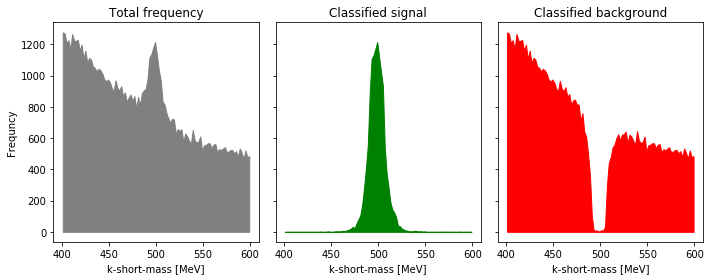

In [27]:
fig, ax = plt.subplots(ncols = 3, figsize = (10, 4), sharey = True)

ax[0].fill_between(xs, tot, color = "gray")
ax[0].set_title("Total frequency")
ax[0].set_ylabel("Frequncy")


ax[1].fill_between(xs, sig, color = 'green')
ax[1].set_title("Classified signal")


ax[2].fill_between(xs, bak, color = 'red')
ax[2].set_title("Classified background")

for x in ax:
    x.set_xlabel("k-short-mass [MeV]")

fig.tight_layout()

fig.savefig("../figures/bad_classifier.pdf")